In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
ls

drive/  sample_data/


In [3]:
cd drive

/content/drive


In [4]:
ls

'My Drive'/


In [5]:
cd 'My Drive'/Clipped_NDVI

/content/drive/My Drive/Clipped_NDVI


In [6]:
ls

0.png   3.png                               awifs_ndvi_201710_15_1_clipped.tif
10.png  40.png                              awifs_ndvi_201710_15_2_clipped.tif
11.png  41.png                              awifs_ndvi_201711_15_1_clipped.tif
12.png  42.png                              awifs_ndvi_201711_15_2_clipped.tif
13.png  43.png                              awifs_ndvi_201712_15_1_clipped.tif
14.png  44.png                              awifs_ndvi_201712_15_2_clipped.tif
15.png  45.png                              awifs_ndvi_201801_15_1_clipped.tif
16.png  46.png                              awifs_ndvi_201801_15_2_clipped.tif
17.png  47.png                              awifs_ndvi_201802_15_1_clipped.tif
18.png  4.png                               awifs_ndvi_201802_15_2_clipped.tif
19.png  5.png                               awifs_ndvi_201803_15_1_clipped.tif
1.png   6.png                               awifs_ndvi_201803_15_2_clipped.tif
20.png  7.png                               awifs_nd

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision

In [8]:
torch.cuda.is_available()

True

In [9]:
torch.set_default_dtype(torch.float64)
torch.set_default_tensor_type('torch.cuda.FloatTensor')
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


In [0]:
from skimage.color import rgb2gray
%matplotlib inline
from scipy import ndimage

In [0]:
rgb1 = plt.imread('image1.png')

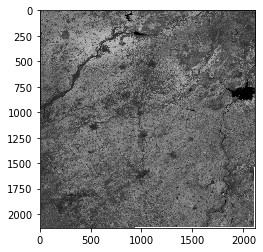

In [0]:
gray1 = rgb2gray(rgb1)
plt.imshow(gray1, cmap='gray')

In [0]:
type(gray1)

numpy.ndarray

In [0]:
gray1 = torch.tensor(gray1, device = device)
print(device)

cuda


In [0]:
gray1.is_cuda

True

In [0]:
gray1.shape

torch.Size([2135, 2118])

In [0]:
gray1.mean()

tensor(0.3939)

In [0]:
new1 = (gray1 > gray1.mean()) * 1

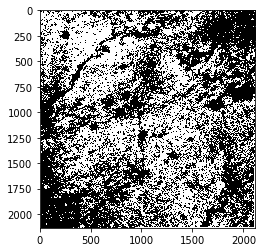

In [0]:
nnew1 = new1.cpu().numpy()
plt.imshow(nnew1, cmap = 'gray')

In [0]:
pip install kmeans-pytorch


In [0]:
from kmeans_pytorch import kmeans

In [0]:
cluster_ids_x, cluster_centers = kmeans(
    X = gray1, num_clusters = 5, distance = 'euclidean', device = device
)

[running kmeans]: 1it [00:00,  7.71it/s, center_shift=35.170193, iteration=2, tol=0.000100] 

running k-means on cuda..


[running kmeans]: 26it [00:01, 17.81it/s, center_shift=0.000000, iteration=26, tol=0.000100]


In [0]:
cluster_ids_x

tensor([3, 3, 1,  ..., 3, 3, 3], device='cpu')

In [0]:
cluster_centers

tensor([[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [0.8213, 0.5956, 0.4218,  ..., 0.5456, 0.6727, 0.8063],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 0.8384, 0.8416, 0.8435],
        [1.0000, 1.0000, 0.9751,  ..., 1.0000, 1.0000, 1.0000]], device='cpu')

In [0]:
cluster_centers.shape

torch.Size([5, 2118])

In [0]:
cluster_ids_x.shape

torch.Size([2135])

In [0]:
cluster_ids_x.min()

tensor(0, device='cpu')

In [0]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0).fit(rgb1.reshape(rgb1.shape[0]*rgb1.shape[1], rgb1.shape[2]))
pic2show = kmeans.cluster_centers_[kmeans.labels_]

In [0]:
pic2show.shape

(4521930, 3)

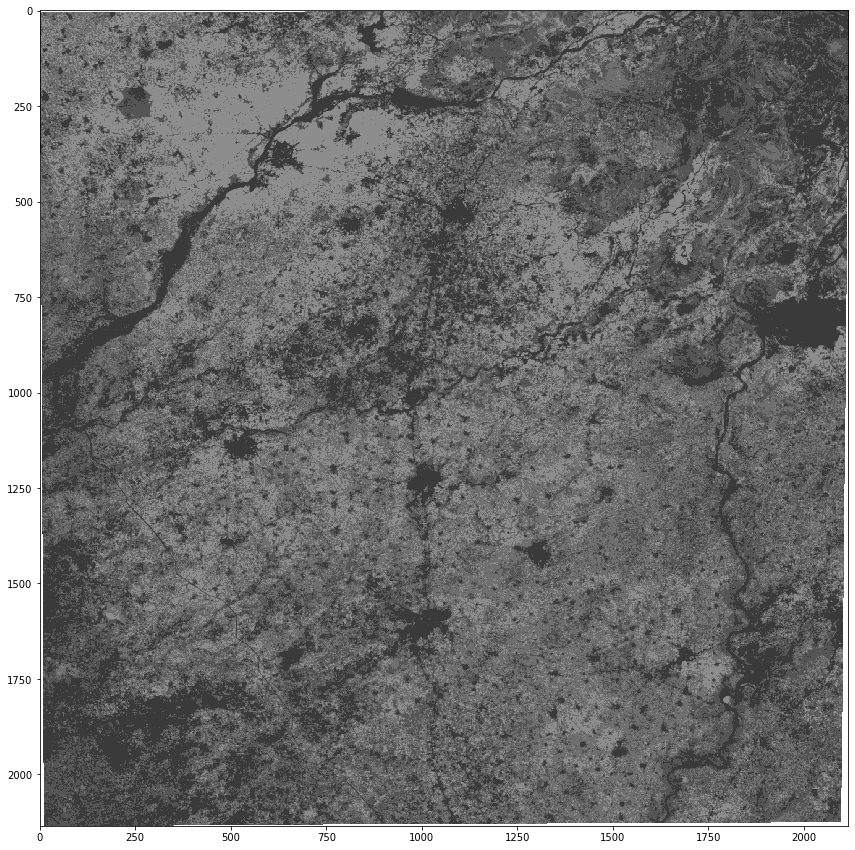

In [0]:
plt.figure(figsize=(15,15))
cluster_pic = pic2show.reshape(rgb1.shape[0], rgb1.shape[1], rgb1.shape[2])
plt.imshow(cluster_pic)

In [0]:
import os
img_all = os.listdir()

In [22]:
img_all

['awifs_ndvi_201701_15_1_clipped.tif',
 'awifs_ndvi_201701_15_2_clipped.tif',
 'awifs_ndvi_201702_15_1_clipped.tif',
 'awifs_ndvi_201702_15_2_clipped.tif',
 'awifs_ndvi_201703_15_1_clipped.tif',
 'awifs_ndvi_201703_15_2_clipped.tif',
 'awifs_ndvi_201704_15_1_clipped.tif',
 'awifs_ndvi_201704_15_2_clipped.tif',
 'awifs_ndvi_201705_15_1_clipped.tif',
 'awifs_ndvi_201705_15_2_clipped.tif',
 'awifs_ndvi_201706_15_1_clipped.tif',
 'awifs_ndvi_201706_15_2_clipped.tif',
 'awifs_ndvi_201707_15_1_clipped.tif',
 'awifs_ndvi_201707_15_2_clipped.tif',
 'awifs_ndvi_201708_15_1_clipped.tif',
 'awifs_ndvi_201708_15_2_clipped.tif',
 'awifs_ndvi_201709_15_1_clipped.tif',
 'awifs_ndvi_201709_15_2_clipped.tif',
 'awifs_ndvi_201710_15_1_clipped.tif',
 'awifs_ndvi_201710_15_2_clipped.tif',
 'awifs_ndvi_201711_15_1_clipped.tif',
 'awifs_ndvi_201711_15_2_clipped.tif',
 'awifs_ndvi_201712_15_1_clipped.tif',
 'awifs_ndvi_201712_15_2_clipped.tif',
 'awifs_ndvi_201801_15_1_clipped.tif',
 'awifs_ndvi_201801_15_2_

In [0]:
import cv2
for i in range(len(img_all)):
  image = cv2.imread(img_all[i], 1)
  cv2.imwrite(str(i)+".png", image)

In [0]:
imgs = os.listdir()[50:]

In [0]:
imgs_arr = []
for each in imgs:
  imgs_arr.append(plt.imread(each))

In [0]:
from sklearn.cluster import KMeans

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


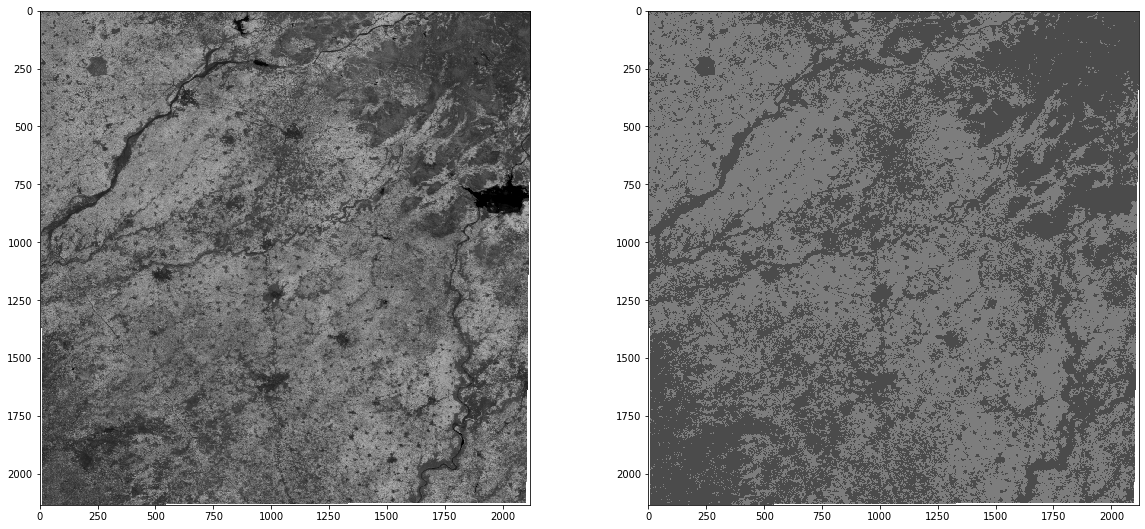

In [28]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
img = imgs_arr[2]
ax1.imshow(rgb2gray(img), cmap = 'gray')
kmeans = KMeans(n_clusters=3, random_state=0).fit(img.reshape(img.shape[0]*img.shape[1], img.shape[2]))
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(cluster_pic)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


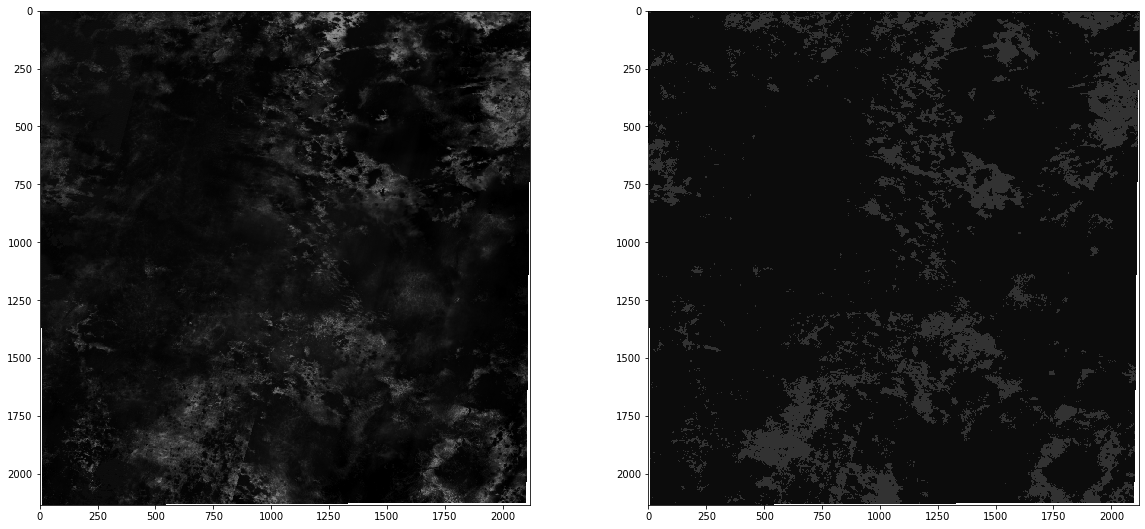

In [97]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
img = imgs_arr[13]
ax1.imshow(rgb2gray(img), cmap = 'gray')
kmeans = KMeans(n_clusters=3, random_state=0).fit(img.reshape(img.shape[0]*img.shape[1], img.shape[2]))
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(cluster_pic)

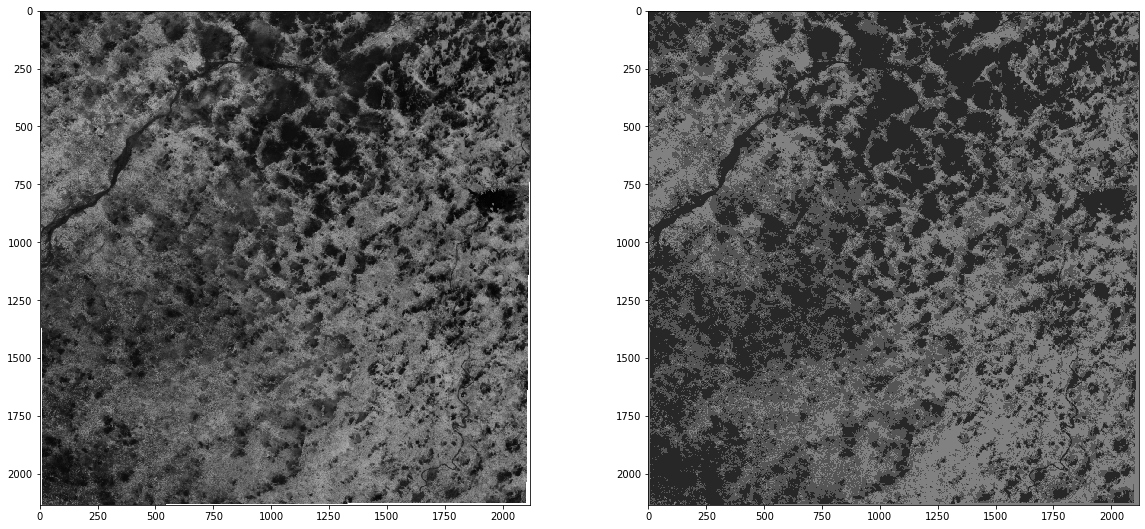

In [98]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(2,2,1)
img = imgs_arr[40]
ax1.imshow(rgb2gray(img), cmap = 'gray')
#from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(img.reshape(img.shape[0]*img.shape[1], img.shape[2]))
pic2show = kmeans.cluster_centers_[kmeans.labels_]
cluster_pic = pic2show.reshape(img.shape[0], img.shape[1], img.shape[2])
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(cluster_pic)

In [0]:
import cv2

In [0]:
image17111 = cv2.imread("awifs_ndvi_201711_15_1_clipped.tif", 1)
image17112 = cv2.imread("awifs_ndvi_201711_15_2_clipped.tif", 1)

In [22]:
cv2.imwrite('image17111.png', image17111)
cv2.imwrite('image17112.png', image17112)
#image17111 = plt.imread('image17111.png')
#image17112 = plt.imread('image17112.png')

True

In [0]:
from google.colab.patches import cv2_imshow, cv_imshow

In [0]:
image17111 = cv2.cvtColor(image17111, cv2.COLOR_BGR2GRAY)

In [0]:
th2 = cv2.adaptiveThreshold(image17111,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,199,5)

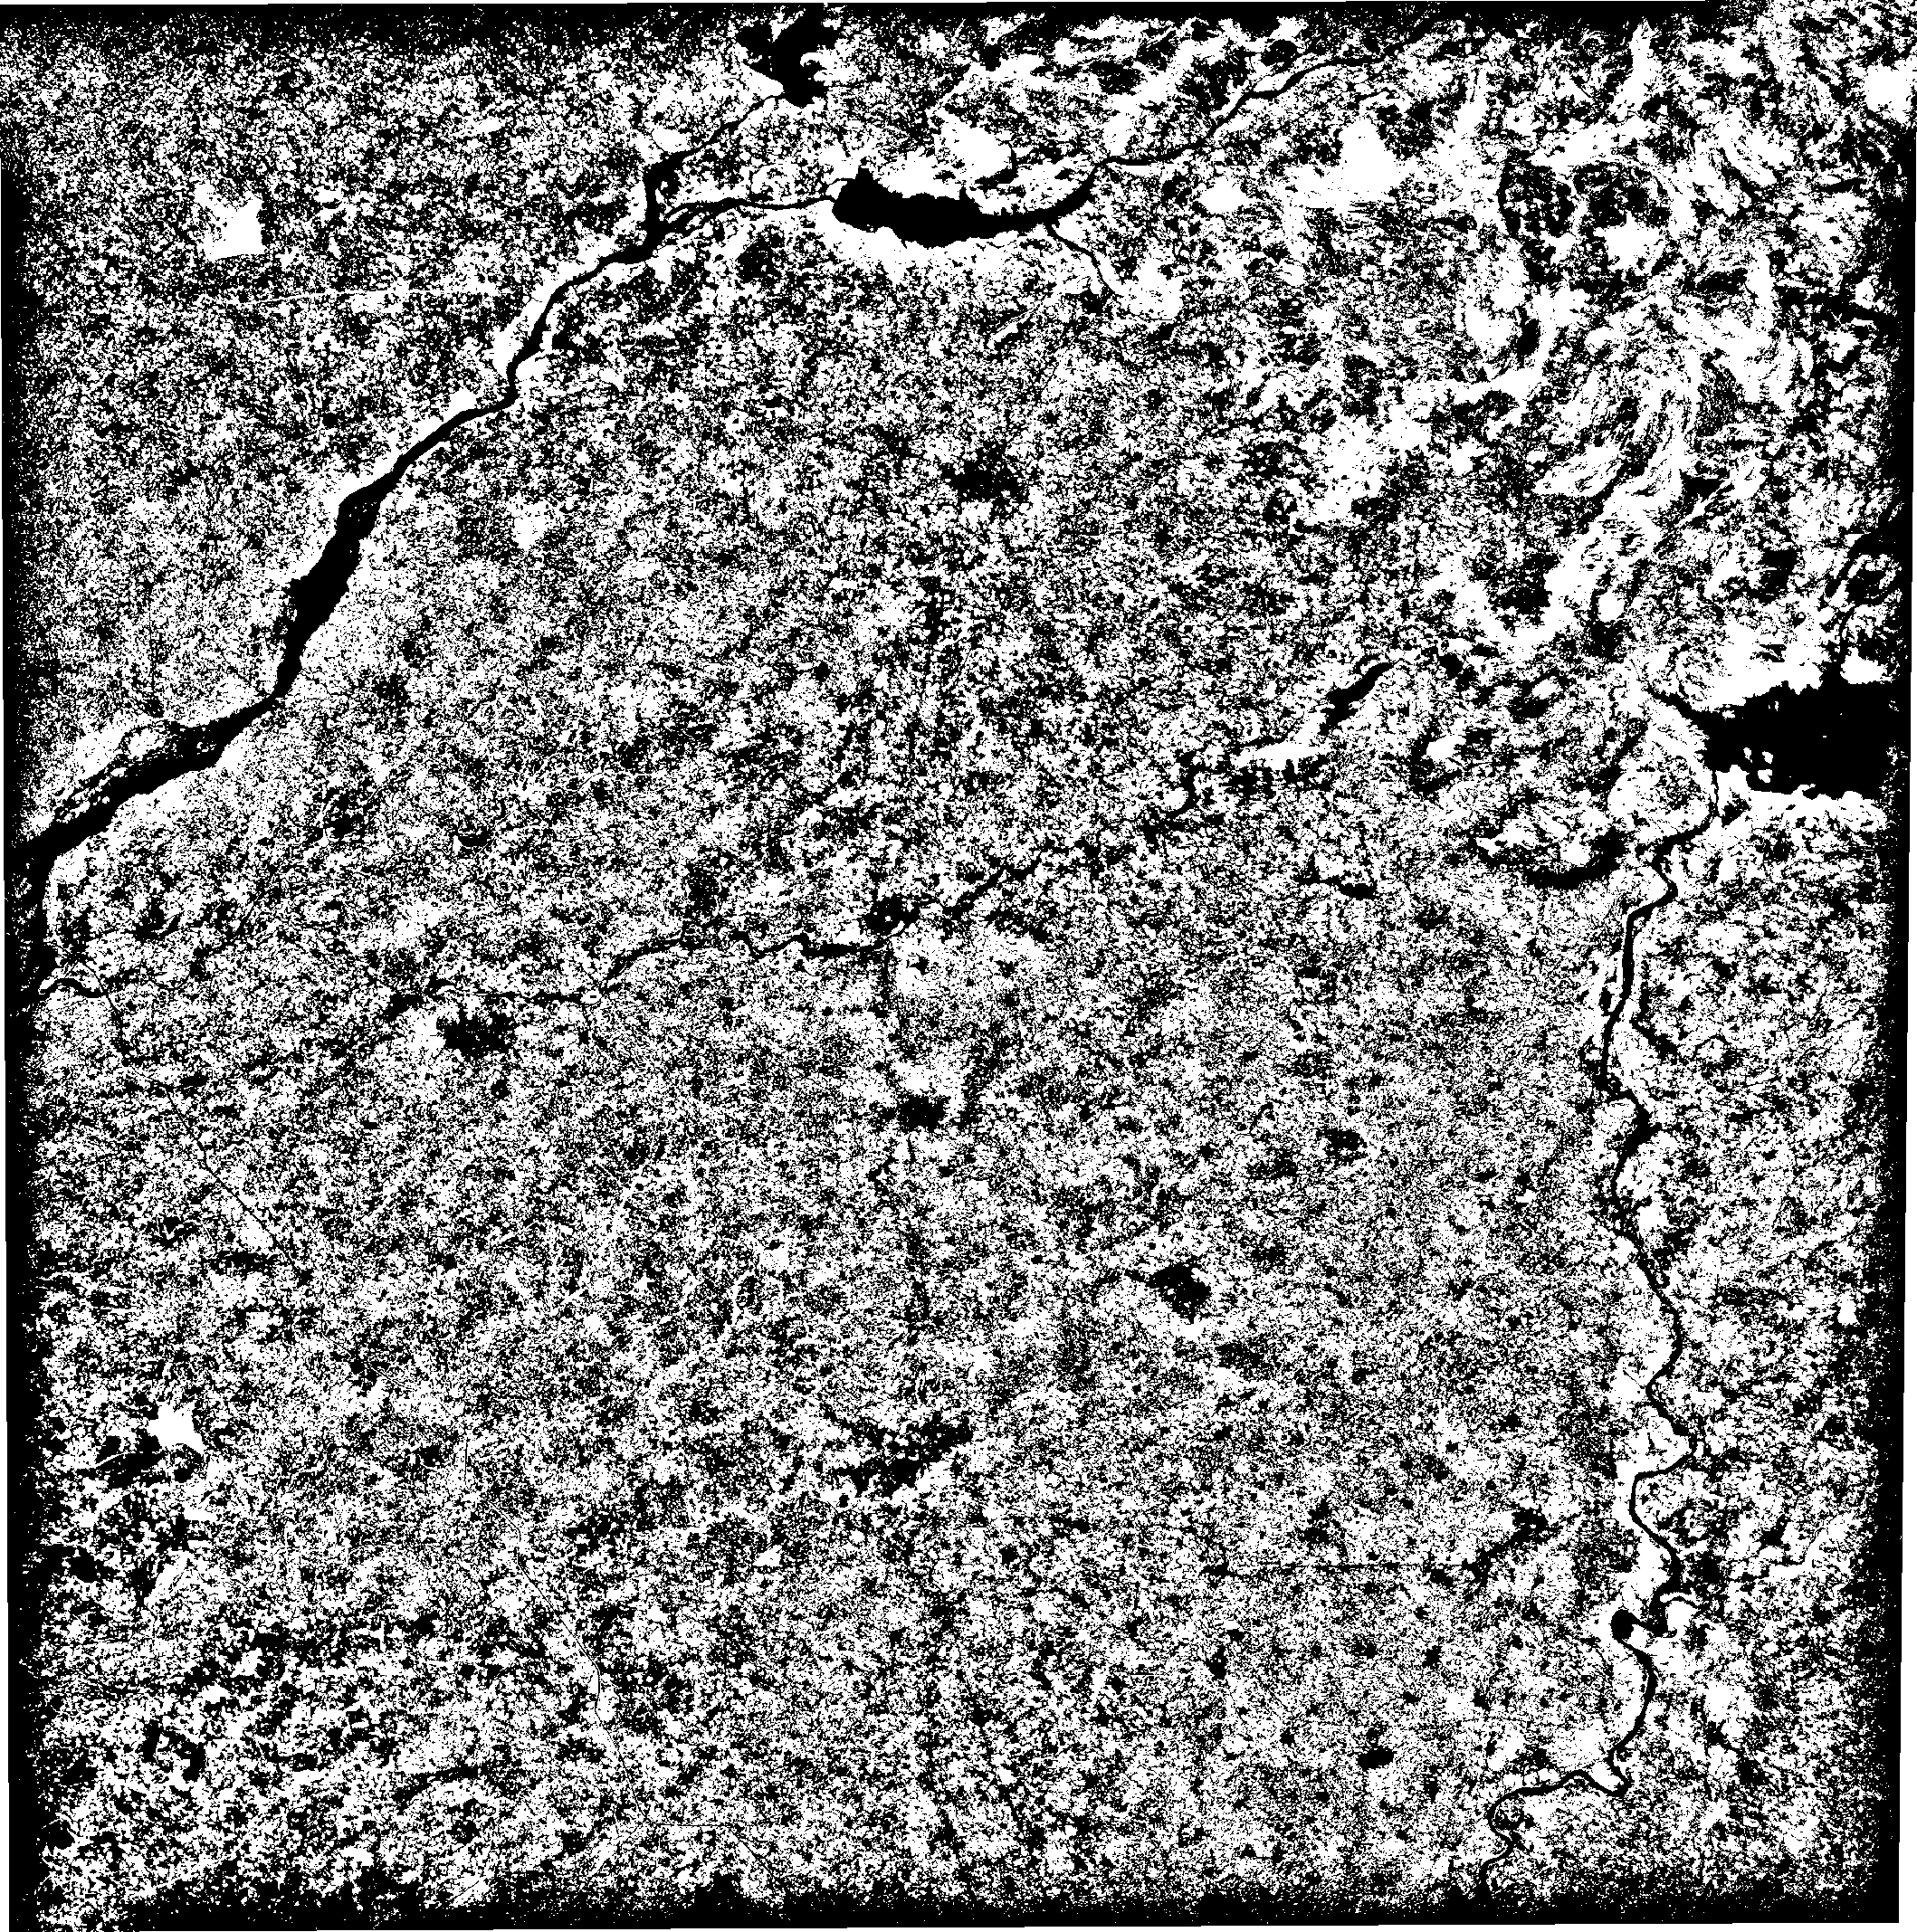

<Figure size 360x360 with 0 Axes>

In [31]:
plt.figure(figsize=(5,5))
cv_imshow(th2)

In [0]:
image17112 = cv2.cvtColor(image17112, cv2.COLOR_BGR2GRAY)

In [0]:
th3 = cv2.adaptiveThreshold(image17112,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,351,5)

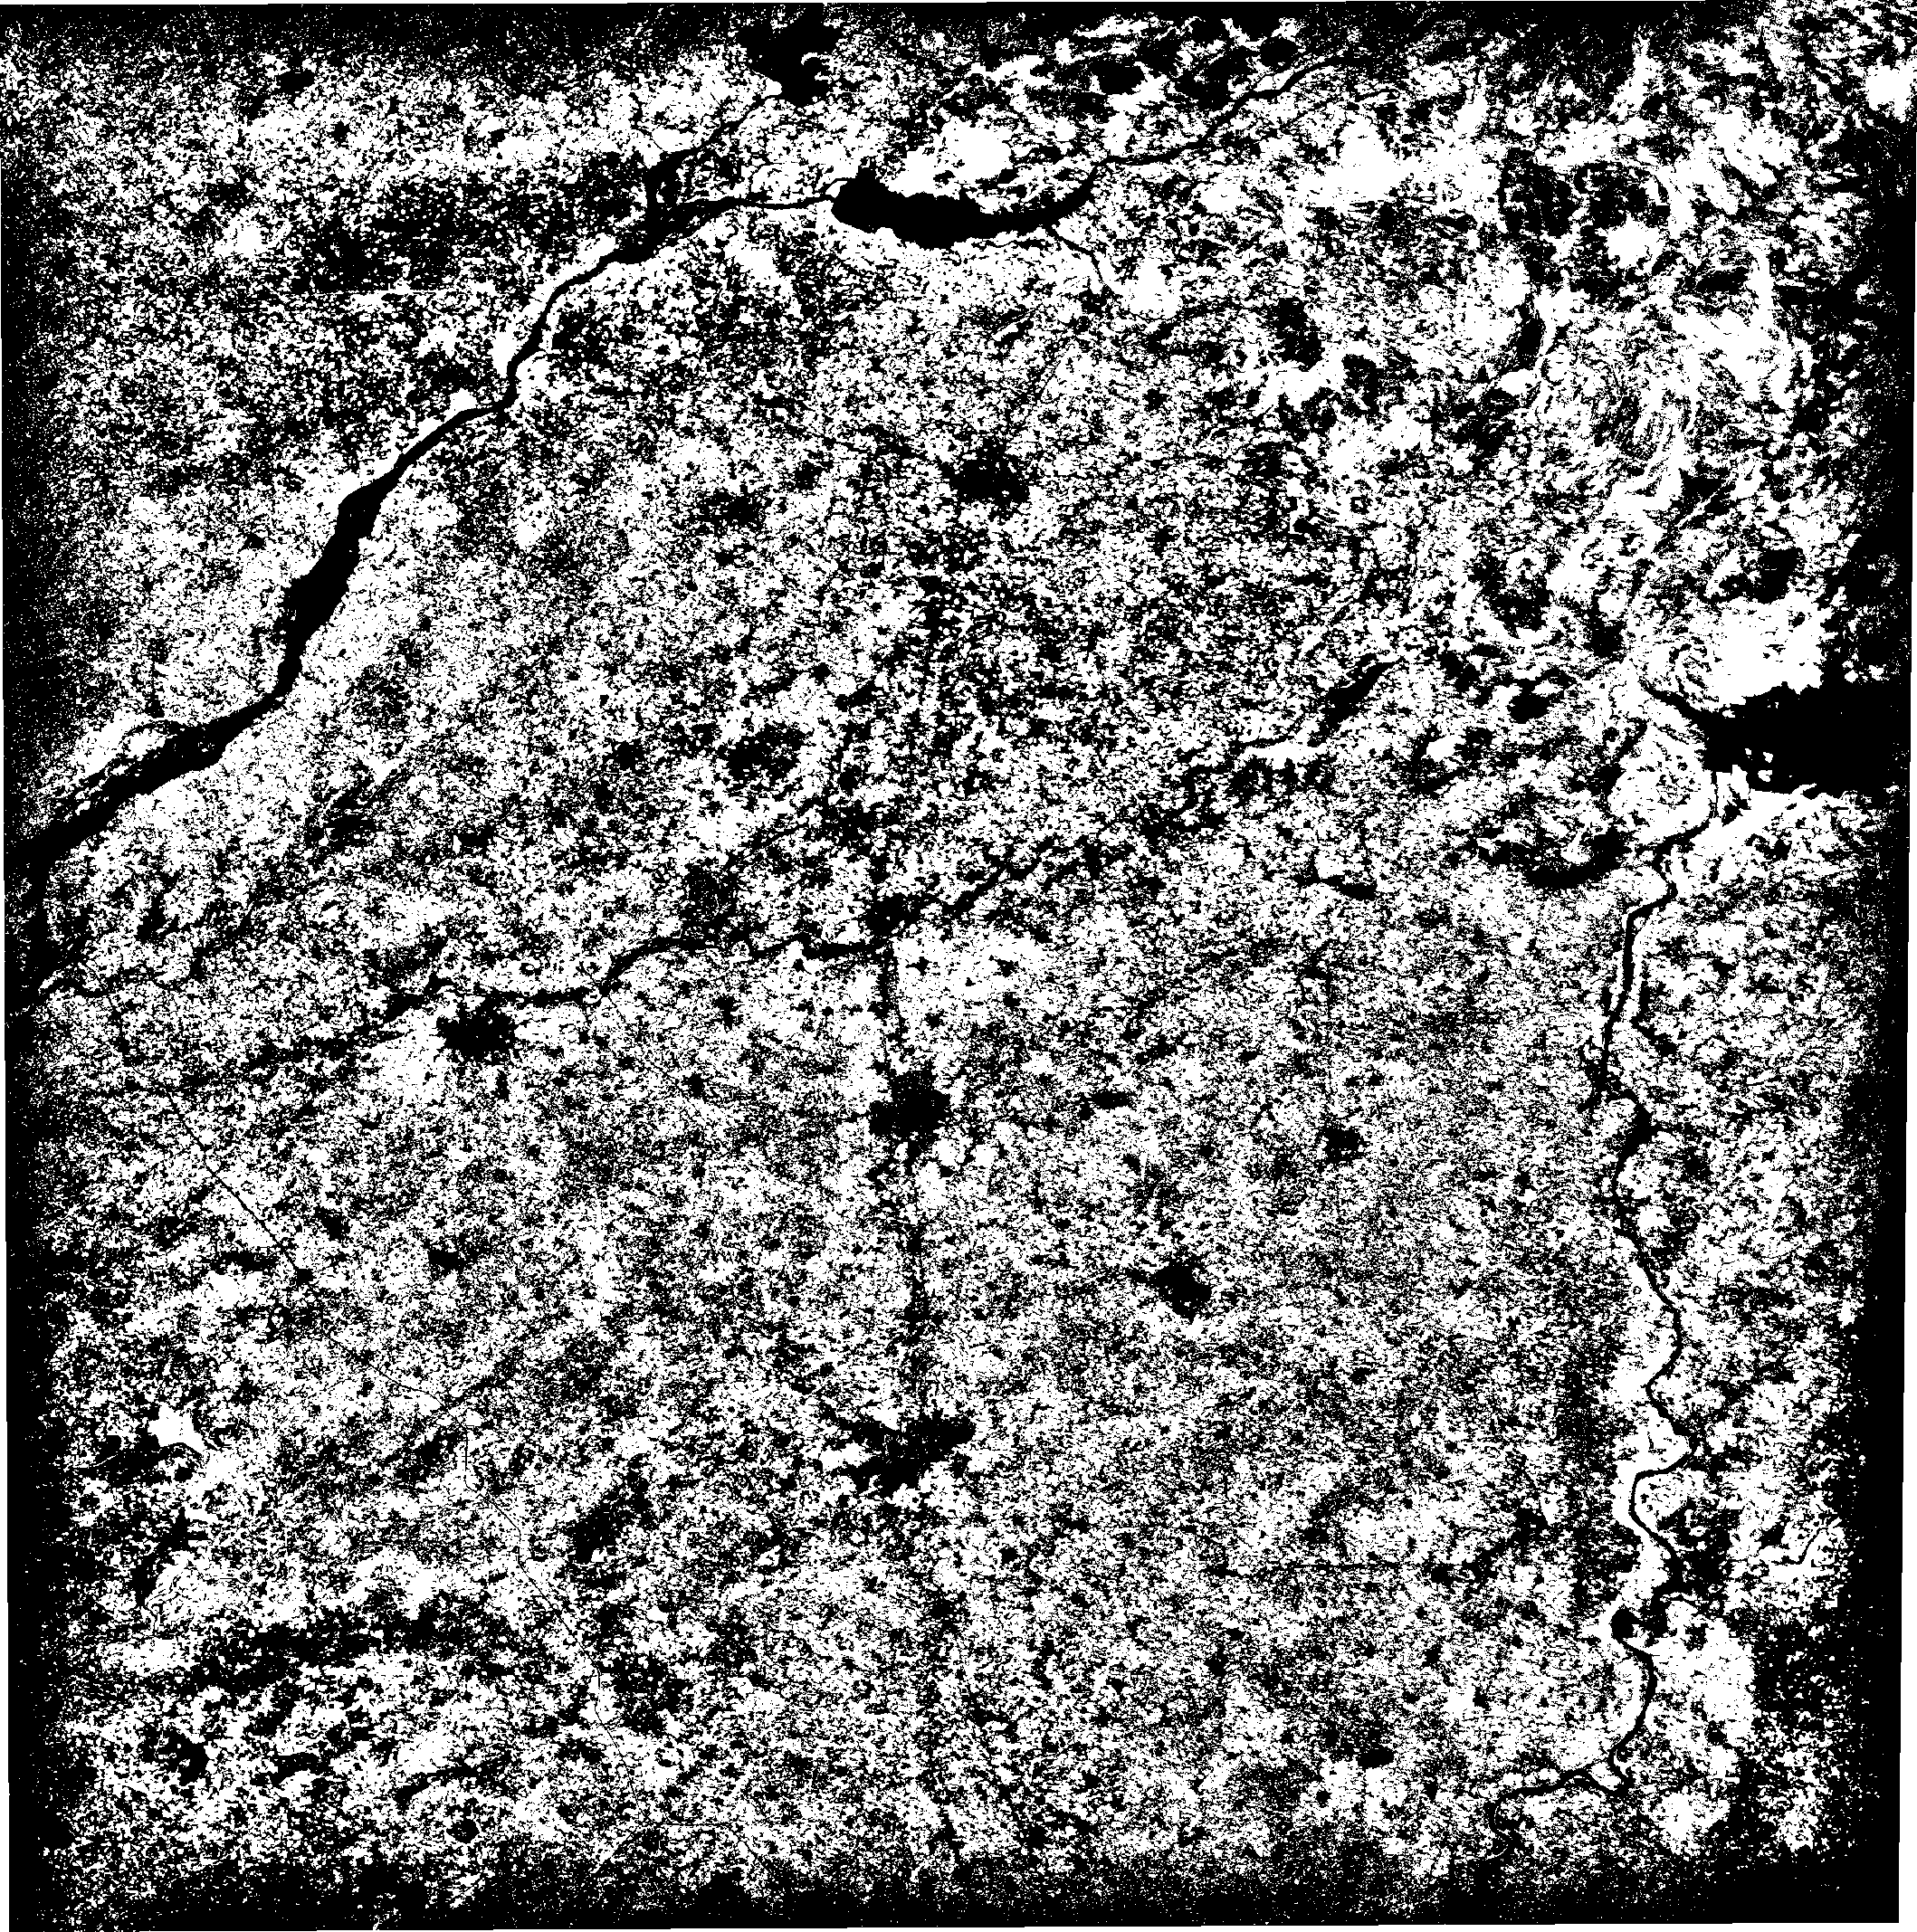

In [50]:
#cv_imshow(th2)
cv_imshow(th3)
#cv2.waitKey(0)